## I/O操作 文件操作 默认编码gbk 中文编码 mode-'w' 每次写入会覆盖原文件 'a'追加数据 'w''a'写入时 是str类型 'wb''ab'写入时是bytes 需要加.encode("utf-8")

In [ ]:
a=open('sample1.txt','a')  ##打开文件 mode w
a.write('i write somthing\n')
a.write('i')
a.close()

## 读取 f.read(n)读n个字符 f.readlines(m)逐行读取读前m行 f.readline()读一行

In [ ]:
f=open('sample1.txt','rb')
#print(f.read()) ##光标移动到末尾
# print(f.read(12)) ## 光标以后读12个字符
# print(f.readlines(2))
# print(f.readlines(1))
data=f.read()
print(data)
print(data.decode('gbk'))  ##带b的时候都要编码或者解码读出 写str.encode('utf-8')编码为bytes写入 读用gbk将bytes解码读出
f.close()

## matplotlib

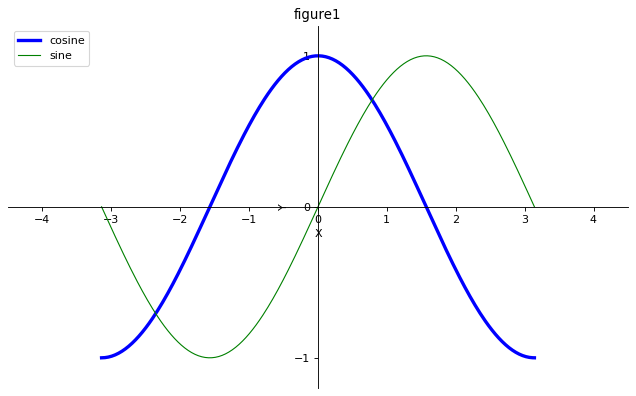

In [3]:
import numpy as np   
import matplotlib.pyplot as plt  
# X=np.linspace(-np.pi,np.pi,256,endpoint=True) ##np.linspace(start,stop,endpoint=True##stop是否为终点，retstep=True##是否显示步长)
# # print(X)
# C,S=np.cos(X),np.sin(X)

# plt.plot(X,C)
# plt.plot(X,S)
# plt.show()
plt.figure(figsize=(10,6),dpi=80)  ##创建一个10*6的点图，分辨率80 改变画布的形状等
plt.subplot(1,1,1)  #创建一个新的1*1的子图 在第一块画图（此时就一块）
X=np.linspace(-np.pi,np.pi,256,endpoint=True)
C,S=np.cos(X),np.sin(X)
plt.plot(X,C,color='blue',linewidth=3.0,linestyle='-',label='cosine') ##用蓝色 连续 宽度1的线画
plt.plot(X,S,color='green',linewidth=1.0,linestyle='-',label='sine') ## 添加图例
plt.legend(loc='upper left')  ##标签位于左上角
plt.xlim(-4.5,4.5)##横轴上下限                           ##plt.rcparams['font.sans-serif']='SimHei'显示中文  实际上是修改键值，参数为一个字典
plt.xticks(np.linspace(-4,4,9)) ##横轴上取点标记       plt.rcparams['axes.unicode']=False 显示正常字符
plt.ylim(-1.2,1.2)                                                   ##[]
plt.yticks(np.linspace(-1,1,3))

################################################ 轴操作
# plt.axis('on') ##开关坐标轴
ax=plt.gca()## gca:get current axes  获取当前轴 进行操作
ax.spines['right'].set_color('none') ##将右边的spines（脊柱） 颜色变为无色
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom') ##锁定底部的轴 准备进行操作
ax.spines['bottom'].set_position(('data',0))##移动到 data=0的地方 y=0
ax.yaxis.set_ticks_position('left')
ax.spines['left'].set_position(('data',0))
################################################ 添加标签 标题
plt.xlabel('X')
plt.ylabel('Y')
plt.title('figure1')
################################################ 给一些特殊点做注释
# t=2*np.pi/3
# plt.plot([t,t],[0,np.cos(t)],color='blue',linewidth=2.5,linestyle='--') ## 
# scatter([t,][np.cos(t),]) ##
# plt.ax=plt.figure.add_axes([0,0,1,1])
# print(plt.rcParams)  ## 查看当前所有参数设置
plt.savefig('1.png',dpi=90)  ##保存分辨率为90的图
plt.show()

## pyhorch 类型设置  set:  .DoubleTensor - float64 ; FloatTensor-float32 ;|| .long()-int64 ; .int()-int32;.float()-float32;.double()-float64

In [43]:
import torch
torch.tensor([1.3,3.2]).dtype ## torch.tensr() 生成一个新的张量 .dtype 表示类别
torch.set_default_tensor_type(torch.DoubleTensor) ##设置默认张量数据格式 为 float64
torch.tensor([1.2,3.2]).dtype
torch.get_default_dtype() ## 输出默认设置类型
torch.tensor([1.2,2.2]).long()  ##
torch.tensor([1.2,2.2]).double().dtype
a=torch.tensor([1.2,2.2])
print(a.shape,a.size(),a.numel())

torch.Size([2]) torch.Size([2]) 2


## .shape=.size()  .numel() 数量

In [66]:
import torch
b = torch.tensor([2,3],dtype=torch.float32,requires_grad=True) ## 在torch.tensor()可以设置类型，梯度
print(b)
y=b.pow(4).sum() ## b.pow(x)=b**x; .sum() 算梯度 b**3.sum()=3*b**2
y.backward()
print(b.grad)

tensor([2., 3.], dtype=torch.float32, requires_grad=True)
tensor([ 32., 108.], dtype=torch.float32)


In [51]:
# # b=torch.tensor([1.,2.,3.])
# y=b.pow(2).sum()
# y.backward()
# b.grad

## torch.tensor([],dtype=,requires=)设置具体张量 torch.Tensor()不仅如此还能指定维度大小 不能设置类型参数等
## torch.new_zeros

In [75]:
import torch
print(torch.Tensor(2,2))
print(torch.Tensor([1,2,3]),torch.Tensor(1,2,3),torch.tensor([[1,2,3],[1,1,1]],dtype=torch.float32))

tensor([[1.5623e+161,  4.1206e-61],
        [ 1.0523e-46, 2.7501e+180]])
tensor([1., 2., 3.]) tensor([[[1., 2., 3.],
         [1., 1., 1.]]]) tensor([[1., 2., 3.],
        [1., 1., 1.]], dtype=torch.float32)


In [100]:
import torch
torch.set_default_tensor_type(torch.FloatTensor)
a=torch.tensor([1,2,3]).int()
b=a.float()
c=torch.Tensor(3,3)
d=torch.Tensor([[1,2,3],[1,1,1],[2,3,4]])
print('a:{},b:{},c:{}'.format(a.dtype,b.dtype,c.dtype))
print(c)
print(torch.get_default_dtype())
f=d.pow(2).sum()
print(f)
e=torch.ones_like(c)   ##与c相同格式的全1张量 
print(e,torch.zeros_like(c)) ## 与c格式相同的全0张量
print(torch.rand_like(c))   # 与c相同格式的随机张量
print(torch.full_like(c,fill_value=26))  ## torch.full_like(a,fill_value=num) 与a格式相同，值全为num的tensor
z=[[1,1,1],[1,2,3]]
x=c.new_tensor(z)   ## c.new_trnsor(b) 内容为b 数据类型为c的tensor
print(type(z),x)


a:torch.int32,b:torch.float32,c:torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
torch.float32
tensor(46.)
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]) tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])
tensor([[0.5127, 0.2576, 0.2067],
        [0.0877, 0.7842, 0.6123],
        [0.2914, 0.0417, 0.0264]])
tensor([[26., 26., 26.],
        [26., 26., 26.],
        [26., 26., 26.]])
<class 'list'> tensor([[1., 1., 1.],
        [1., 2., 3.]])


In [122]:
import torch 
a=[[1,2,3]]
c=torch.tensor([1.,2.,3.])
a=c.new_tensor(a)
a=c.new_full((3,3,3),fill_value=13)
a=torch.full((2,3),fill_value=22)
print(a)

tensor([[22, 22, 22],
        [22, 22, 22]])


In [139]:
import numpy as np
import torch
np.arange(9).reshape(3,3)
a=torch.arange(12).reshape(2,6)
b=torch.unsqueeze(a,dim=2)
print(a,a.size(),b.size())
print(b)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11]]) torch.Size([2, 6]) torch.Size([2, 6, 1])
tensor([[[ 0],
         [ 1],
         [ 2],
         [ 3],
         [ 4],
         [ 5]],

        [[ 6],
         [ 7],
         [ 8],
         [ 9],
         [10],
         [11]]])


## all(list/tuple..) 类似and 只要有 0，false，none 值为false； any() 类似 or 全为 0，false，none 值为false；
## sorted() 可用于tuple/list 生成新的list     list.sort()只能用在list ; reverse()
## zip(list/tuple/..) 将内容打包  enumerate（） 将索引和内容合并 

In [146]:
li=[0,1,2,3,4,6,12,5]
li.sort(reverse=True)
print(li,all(li),any(li))
print(sorted(li),li)
tuple1=(1,3,2,6,5,7,4)
c=sorted(tuple1)
print(c)

[12, 6, 5, 4, 3, 2, 1, 0] False True
[0, 1, 2, 3, 4, 5, 6, 12] [12, 6, 5, 4, 3, 2, 1, 0]
[1, 2, 3, 4, 5, 6, 7]


In [172]:
str1='hello world'
li1=['as','w','qe']
print(list(zip(range(len(li1)),li1)))


[(0, 'as'), (1, 'w'), (2, 'qe')]


In [161]:
bookpage=[]
book=input('请输入书本号(每个项目用空格隔开)：')
bookname=input('请输入书名:')
bookpos=input('请输入书的位置：')
book=book.split(' ')
bookname=bookname.split(' ')
bookpos=bookpos.split(' ')
bookzip=zip(book,bookname,bookpos)
for item in bookzip:
    bookdict={'书号':item[0],'书名':item[1],'位置':item[2]}
    bookpage.append(bookdict)
    pass


请输入书本号(每个项目用空格隔开)： 1 2  3  
请输入书名: yu shu ying
请输入书的位置： 11 22 33


In [163]:
print(bookpage)
# print(bookpage.index('英语'))

[{'书号': '1', '书名': 'yu', '位置': '11'}, {'书号': '2', '书名': 'shu', '位置': '22'}, {'书号': '', '书名': 'ying', '位置': '33'}]


In [182]:
dict1={'名字':'zmh','学号':'123','年龄':'22'}
dict2={'name':'zz','num':'222','year':'11'}

a=zip(dict1.values(),dict2.values())
print(type(a))
for i in a:
    print(type(i))
    print(i[0],i[1])
    print(tuple(a))
    pass

print(tuple(a))

<class 'zip'>
<class 'tuple'>
zmh zz
(('123', '222'), ('22', '11'))
()


## 正则表达式  re.match(pattern,string,flags)  从起始位置匹配 成功返回 失败 none

In [28]:
import re
strdata='my name is zmh'
res=re.match('(.*)is(.*?).*',strdata,re.I|re.M)
if res:
    print('匹配成功')
    print(res)
    print(res.groups())  # 以元组形式输出匹配的内容
    print(res.group())  # 
    print(res.group(1))
    print(res.group(2))
else:
    print('匹配失败')

匹配成功
<re.Match object; span=(0, 14), match='my name is zmh'>
('my name ', '')
my name is zmh
my name 



In [46]:
import re
print(re.match('my','my name is zmh').span())  ## .span() 在起始位置匹配 有则匹配 无则报错
# print(re.match('zmh','my name is zmh').span())
print(re.match('zmh','my name is zmh'))  ## re.match() 匹配开头是否满足
print(re.search('zmh','my name is zmh')) ## re.search() 匹配整段

(0, 2)
None
<re.Match object; span=(11, 14), match='zmh'>


## re.search(pattern,str,flag)   扫描整个字符串 返回匹配的第一个

In [43]:
import re
data1='\nabcdefg'
data2='abcdefg'
pattern='...'  ## 一个.匹配一个除了\n的字符
print(re.match(pattern,data1))
print(re.match(pattern,data2))
print(re.match(pattern,data2).group())
# print(re.match(pattern,data2).group(1))
# print(re.match(pattern,data2).group(2))
print(re.match(pattern,data2).groups())
# print(re.match('[\nabc]',data1))  # [abc] 匹配abc中的其中一个 
# print(re.match('[abcd]',data2))
a='a','b','as','g','re','qw'
for i in a:
    print(re.match('[a-z]',i))   ## [a-z] 匹配a-z中的字符



None
<re.Match object; span=(0, 3), match='abc'>
abc
()
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='b'>
<re.Match object; span=(0, 1), match='a'>
<re.Match object; span=(0, 1), match='g'>
<re.Match object; span=(0, 1), match='r'>
<re.Match object; span=(0, 1), match='q'>


In [67]:
b='123312asd21@sad1 2fc23  4g%asd _  f_t356'
pattern1='\d*2'
pattern2='\d\d'  ## \d匹配数字
print(re.match(pattern1,b))
print(re.match(pattern2,b))
print(re.search('\D',b))   # \D匹配非数字
print(re.search('\s',b))    #\s匹配空白字符或tab
print(re.search('\S\S\s',b)) #\S匹配非空白字符

<re.Match object; span=(0, 6), match='123312'>
<re.Match object; span=(0, 2), match='12'>
<re.Match object; span=(6, 7), match='a'>
<re.Match object; span=(16, 17), match=' '>
<re.Match object; span=(14, 17), match='d1 '>


In [65]:
b='123312asd21@sad1 2fc23  4g%asd _  f_t356'
print(re.match('\w\w',b))  #\w匹配a-z,A-Z,0-9
print(re.search('\W',b))   ##\W匹配非单词
print(re.search('\w\w\W',b))

<re.Match object; span=(0, 2), match='12'>
<re.Match object; span=(11, 12), match='@'>
<re.Match object; span=(9, 12), match='21@'>


In [106]:
print(re.match('[a-z][a-z]*','happy'))  ## *前面的样式 匹配0次或者无数次都行
print(re.match('[a-zA-Z][A-Z]*','happy'))
print(re.match('[a-zA-Z][A-Z]+','happy'))  ## +前面至少匹配一次
print(re.match('[a-z]+','happy'))
print(re.match('[a-z][A-Z]?','happy'))  ## ? 前面的至多一次
print(re.match('[a-z]{3}','happy'))

<re.Match object; span=(0, 5), match='happy'>
<re.Match object; span=(0, 1), match='h'>
None
<re.Match object; span=(0, 5), match='happy'>
<re.Match object; span=(0, 1), match='h'>
<re.Match object; span=(0, 3), match='hap'>


In [91]:
print(re.search('\w+@\w+.\w+','123231asd@qq.com'))

<re.Match object; span=(0, 16), match='123231asd@qq.com'>
